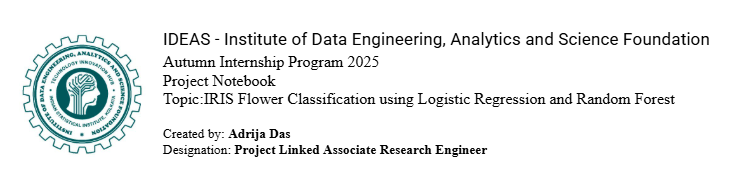

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.It is one of the most famous datasets in machine learning. It contains measurements of 150 iris flowers from three different species:

1.Iris Setosa

2.Iris Versicolor

3.Iris Virginica


For each flower, we have 4 numerical features:

1.Sepal length (cm)

2.Sepal width (cm)

3.Petal length (cm)

4.Petal width (cm)

The goal is to build a classification model that can predict the species of an iris flower based on its features.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading and Visualization

In [ ]:
# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Map numeric labels to species names
species_map = dict(zip(range(3), iris.target_names))
y = y.map(species_map)

# Combine for quick view
df = pd.concat([X, y], axis=1)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [ ]:
# Dataset info
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

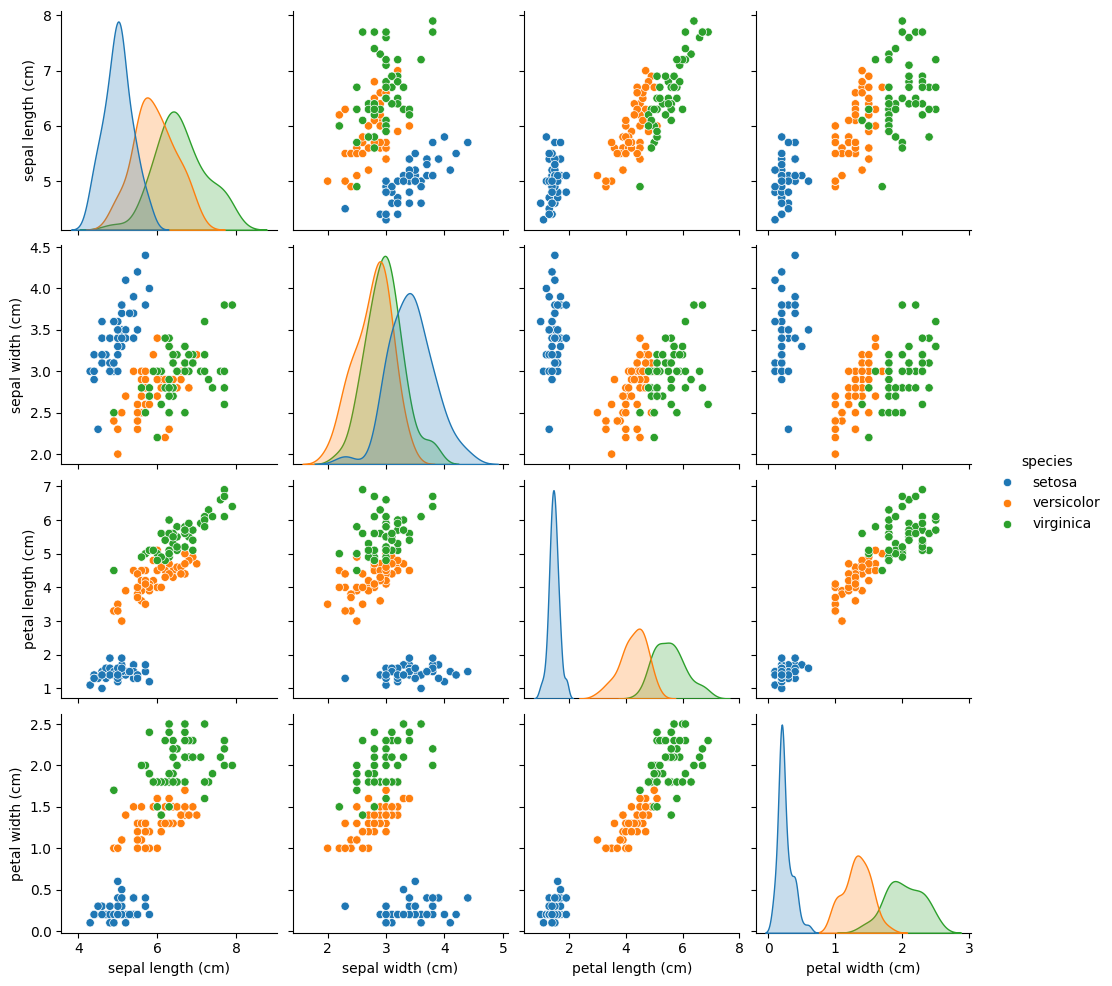

In [ ]:
# Pairplot visualization
sns.pairplot(df, hue="species")
plt.show()

**Question 1**

 From the scatterplot/pairplot above which two features seem most useful for separating species?


Answer
Petal length and petal width seem most useful for separating species.

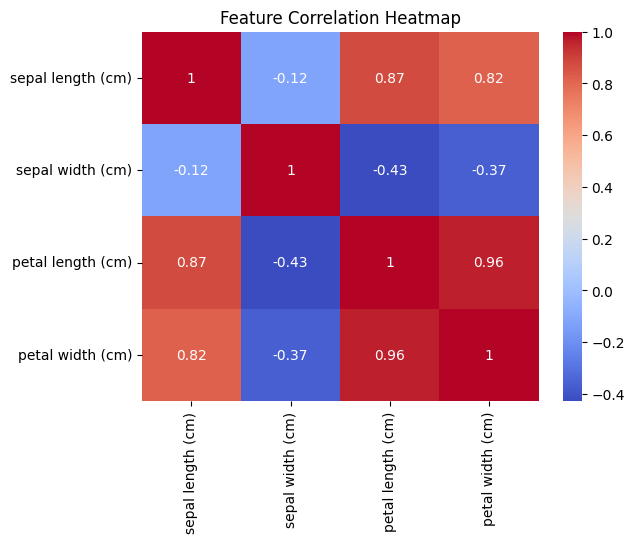

In [ ]:
#Heat Map Visualisation
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


**Question 2**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?


Answer
Petal length and petal width are most correlated , this implies that as petal length increases , petal width also increases, and both features provide similar information about the species.

# Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 105
Test samples: 45


 **Question 3**.

  Why do we split the dataset into training and testing sets?


Answer
This ensures that the model isn't just memorizing the data but can make accurate predictions on new output.

# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

Accuracy (Logistic Regression): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



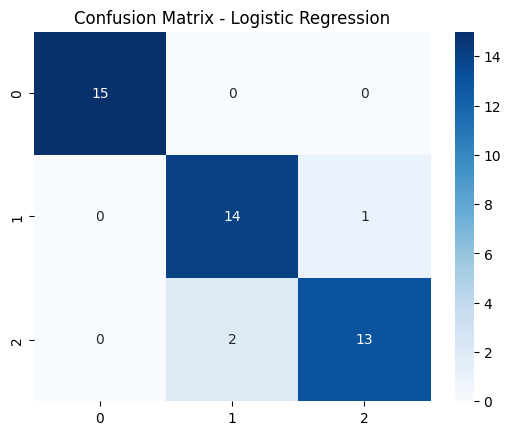

In [ ]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Question 4.**

 Logistic Regression assumes a linear decision boundary. why?

 Answer
Logistic Regression predicts probabilities using a linear combination of features inside the logistic function . The decision threshold creates a linear hyperplane that separates the classes.

**Question 5.**

Do you think this assumption holds for the Iris dataset? Why or why not?

Answer
The linear boundary assumption partially holds. It separates Setosa well ,but Versicolor and Virginica overlap, so a linear boundary cannot perfectly separate them.

# Random Forest
Random forest is a popular ensemble learning method for classification.Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.



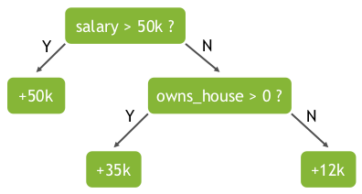
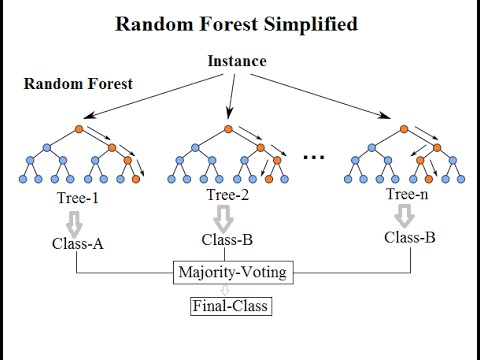

Question 5
Do you think this assumption holds for the Iris dataset? Why or why not?
Answer
The linear decision boundary assumption partially holds . It separates Setosa well from other species,but Versicolor and Virginica overlap, so a linear boundary cannot perfectly separate them.

Accuracy (Random Forest): 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



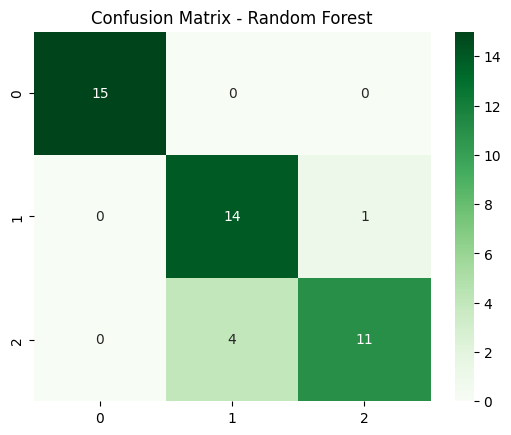

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Question 6
If we increased the number of trees (n_estimators) in Random Forest , how might the performance change?

**Question 6**.

 If we increasd the number of trees (n_estimators) in Random Forest, how might the performance change?
 Answer
 Increasing n_estimators generally improves accuracy by reducing variance, but after a certain point, the improvment becomes negligible and training time increases.


**Question 7**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?
Answer
Random Forest performed better than Logistic Regression because it can handle nonlinear boundaries and overlapping classes , whereas Logistic Regression assumes a liniear decision boundary.

**Question 8**.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?
Answer
For a larger dataset with noisy features , Random Forest would generalize better because it reduces variance through averaging and handles irrelevant or noisy features more effectively than Logistic Regression.

**Question 9.**

Run the Entire Notebook with this dataset separately http://archive.ics.uci.edu/dataset/174/parkinsons. Also Answer the above questions for this dataset too.

The Parkinson’s dataset was first introduced by Max Little and colleagues at Oxford University.
Its goal is to detect Parkinson’s disease using voice recordings. Patients with Parkinson’s often show subtle changes in their speech, so this dataset captures biomedical voice features.

Features include:
Frequency measures → Fo (average), Fhi (max), Flo (min)
Voice variations → Jitter, Shimmer
Voice quality → HNR (Harmonics-to-Noise Ratio)
Other signal processing measures like NHR, DFA, etc.

Target variable:
status = 1 → Parkinson’s
status = 0 → Healthy

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

** Data Loading and Visualization **

In [ ]:
#Load Parkinsons Dataset
df = pd.read_csv("parkinsons.data")
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [ ]:
# Dataset info
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

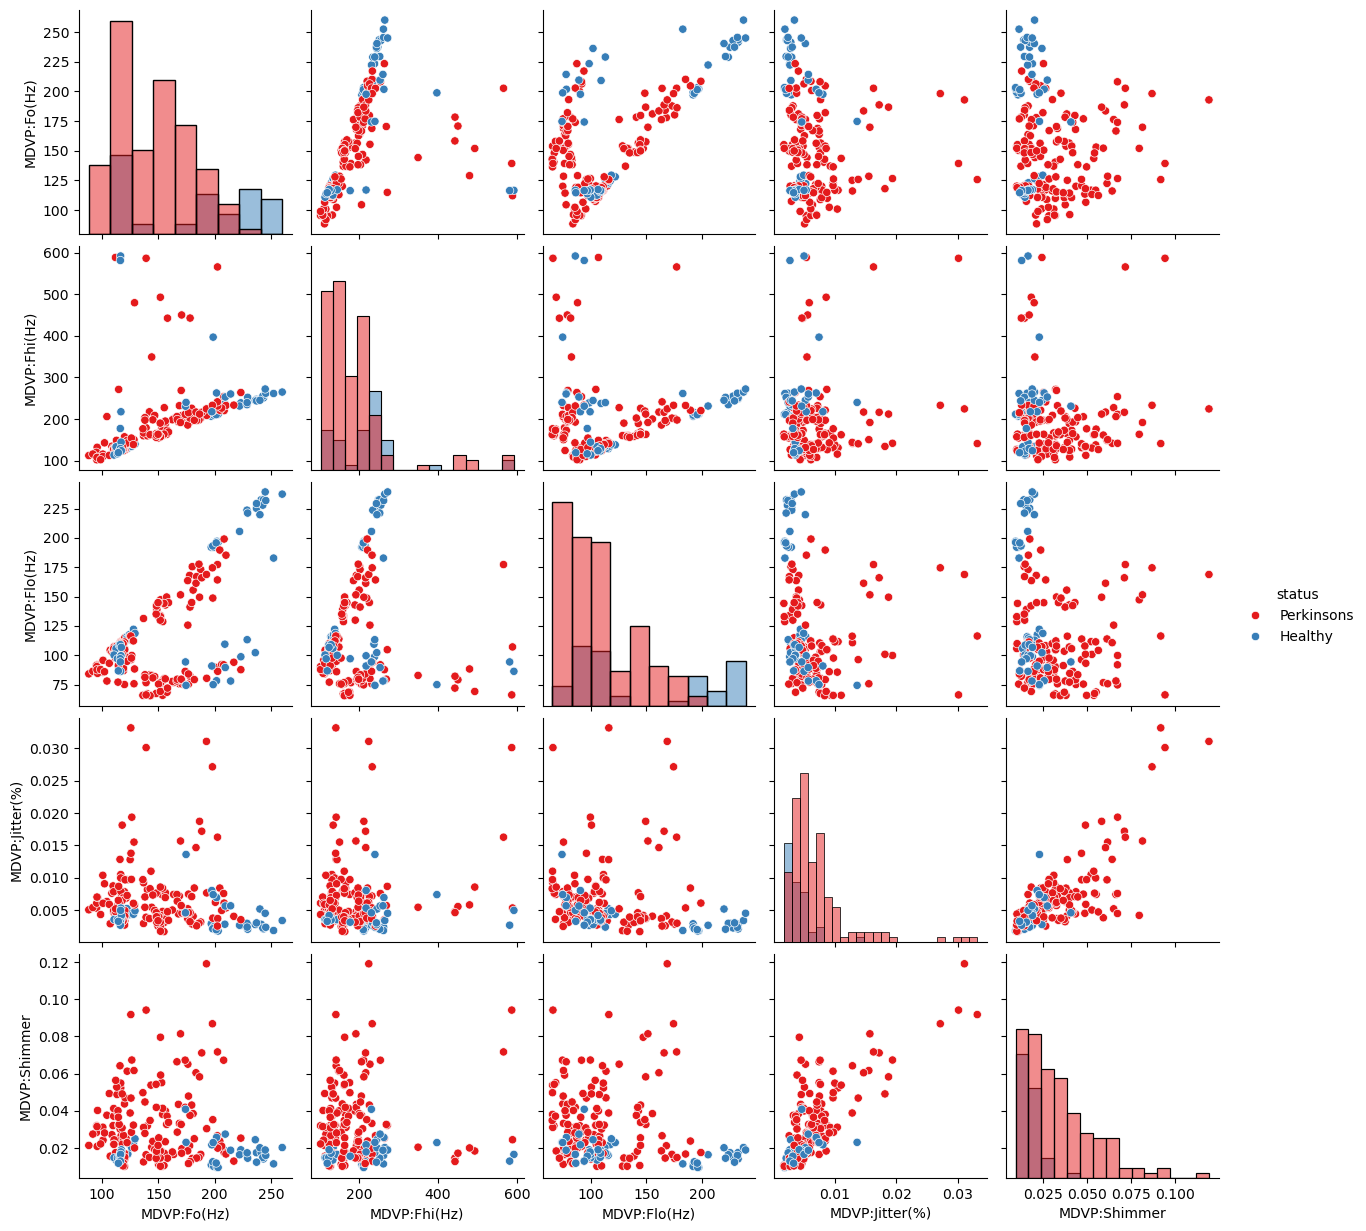

In [ ]:
# Pairplot Visualization
df= pd.read_csv("parkinsons.data") #Load dataset
df.columns = df.columns.str.strip() #Clean column names(remove hidden spaces if any)
features = [ "MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Shimmer"] # Pick a subset of features for visualization.
df_subset = df[features+["status"]].copy()# Build subset
df_subset["status"]=df_subset["status"].map({0:"Healthy",1:"Perkinsons"}) #Convert status to string labels
df_subset=df_subset.dropna() # Drop NaNs just in case
sns.pairplot(df_subset, hue="status",diag_kind ="hist", palette ="Set1") # Pairplot with hue based on status (0=healthy, 1= Parkinson's)
plt.show()

### Question 1:
From the scatterplot/pairplot above which two features seem most useful for separating patients with Perkinson's from healthy individuals?
### Answer:
From the pairplot of the Perkinson's dataset ,the features **Jitter(%)** and **Shimmer** are most useful for separating healthy vs. Parkinson's patients. Patients show higher values on both compared to controls.

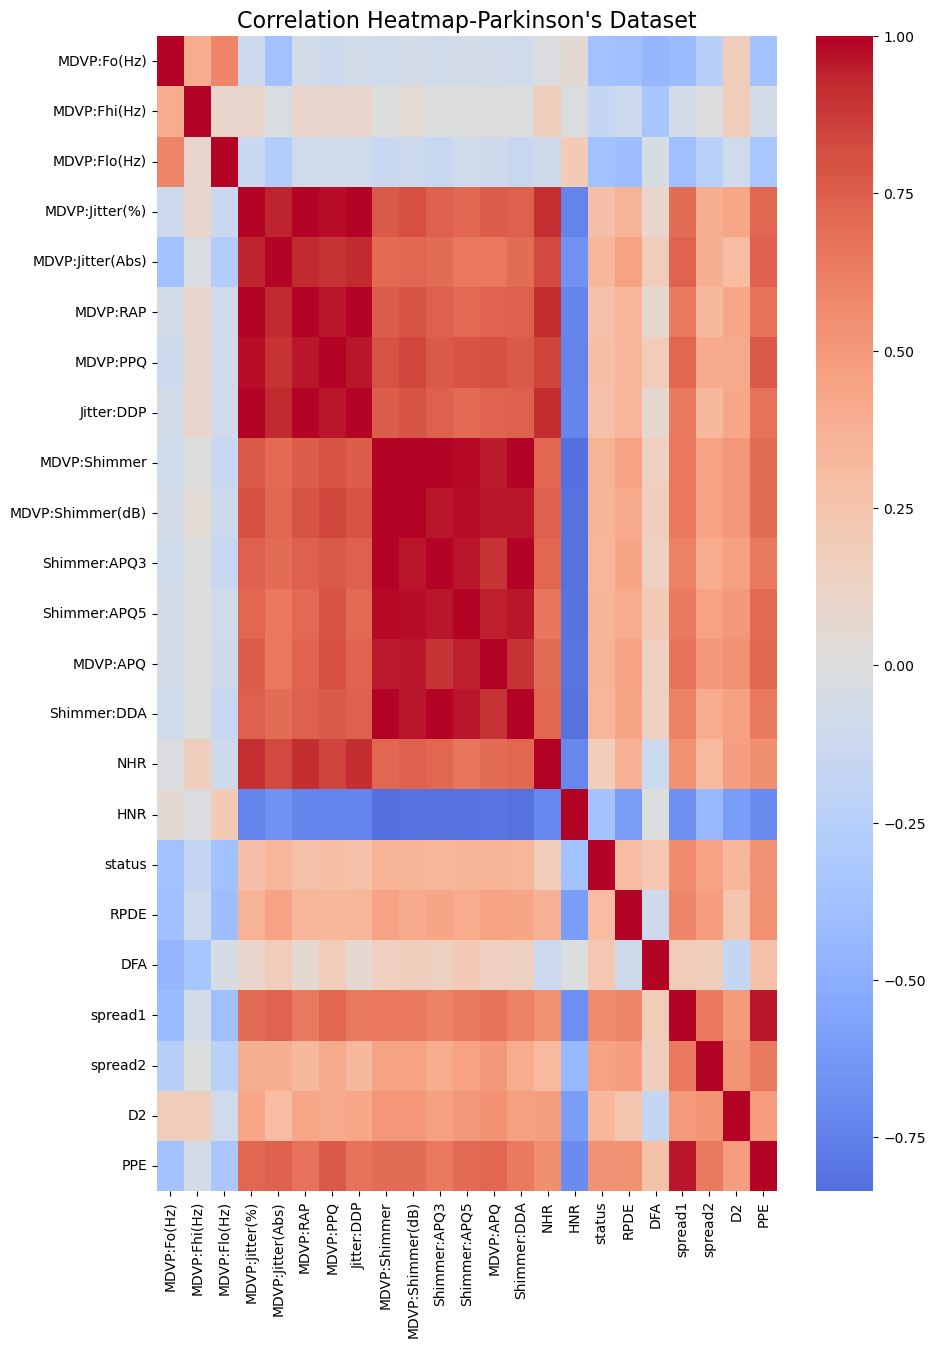

In [ ]:
# Heatmap visualisation
df_num=df.drop(columns=["name"],errors="ignore") #Drop non-numeric columns if present
corr=df_num.corr() # Compute correlation matrix
# Plot Heatmap
plt.figure(figsize=(10,15))
sns.heatmap(corr,annot=False,cmap="coolwarm",center=0)
plt.title("Correlation Heatmap-Parkinson's Dataset",fontsize=16)
plt.show()

### Question 2
Looking at the correlation heatmap,which pair of features are most correlated? what might this imply?
### Answer:
From the correlation heatmap,the pair **MDVP:Fo(Hz)** and **MDVP:Fhi(Hz)** (also Jitter related measures) show the highest correlation.
This implies that these features are **not independent** they capture very similar aspects of vocal frequency/instability. In practice,this may indicate **multicollinearity**,meaning one feature might be redundant for predictive modeling, and feature selection or dimensionality reduction could be useful.

** Train/Test Split**

In [ ]:
# Separate features (X) and target(Y)
X=df.drop("status",axis=1) #features
y=df["status"] #target
# Train-test split(80% train ,20% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print("Training samples:",X_train.shape[0])
print("Test samples:",X_test.shape[0])

Training samples: 156
Test samples: 39


### Question 3
Why do we split the dataset into training and testing sets?
### Answer
We split the dataset into **training** anad **testing** sets to fairly evaluate a model. The **training set** is used to learn patterns. The **testing set** is kept unseen to check performance on new data.
This prevents **overfitting** and endures the model can **generalize** to real-world data.

### Logistic Regression

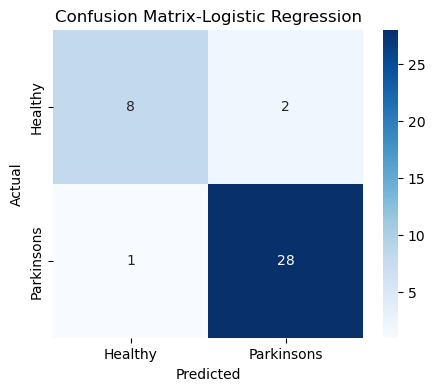

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
df_numeric=df.select_dtypes(include=['float64','int64'])
X=df_numeric.drop("status",axis=1)
y=df_numeric["status"]
#train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
# Feature scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#Logistic Regression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
#Predictions
y_pred=model.predict(X_test)
#Confusion matrix
cm=confusion_matrix(y_test,y_pred)
#Heatmap of confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["Healthy","Parkinsons"],yticklabels=["Healthy","Parkinsons"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix-Logistic Regression")
plt.show()
#classification report
print(classification_report(y_test,y_pred))

### Question 4
Logistic Regression assumes a linear decision boundary.why?
### Answer
Logistic Regression assumes a linear decision boundary because it models the log-odds as a linear function of the input features.

### Question 5
DO you thimk this assumption holds for the Parkinsons dataset?Why or Why not?
### Answer
The linear boundary assumption **partially holds** features like Jitter and Shimmer are somewhat linearly separable,but many vocal features have **nonlinear relationships** ,so a linear model may not capture all patterns.

### Random Forest

Random Forest Accuracy: 0.9230769230769231

Classification Report:
               precision    recall  f1-score   support

           0     0.8889    0.8000    0.8421        10
           1     0.9333    0.9655    0.9492        29

    accuracy                         0.9231        39
   macro avg     0.9111    0.8828    0.8956        39
weighted avg     0.9219    0.9231    0.9217        39



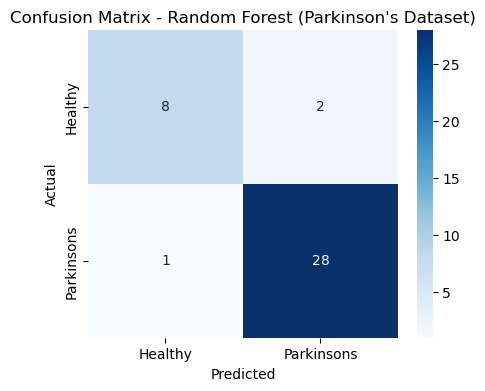

In [ ]:
# ---- Random Forest Classifier ----
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# ---- Accuracy and Report ----
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# ---- Confusion Matrix Heatmap ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy","Parkinsons"],
            yticklabels=["Healthy","Parkinsons"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Parkinson's Dataset)")
plt.show()


### Question 6
If we increased the number of trees (n_estimators)in Random Forest,how might the performance change?
### Answer
Increasing n_estimators makes Random Forest more stable and may slightly improve accuracy at first. But after 100-200 trees performance **plateaus** and only training time increases.

### Question 7
Between Logistic Regression and Random Forest ,which model performed better?why might that be?
### Answer
Random Forest perform slightly better than Logistic Regression.Reason:It can capture **nonlinear relationships** and **feature interactions** which Logistic Regression may miss.

### Question 8
If we had a much larger dataset with noisy feature ,which model would you expect to generalize better and why?
### Answer
with a larger , noisier dataset,**Random Forest** would generalize better.
Reason: It handles noise and irrelevant features by averaging many trees while Logistic Regression could overfit or be misled by noise.

**Question 10.**

Learn utilising synthetic data in AI using https://www.syngendata.ai to explore the above mentioned data visualisation

Columns in dataset:
Index(['MDVP.Fo.Hz.', 'MDVP.Fhi.Hz.', 'MDVP.Flo.Hz.', 'MDVP.Jitter...',
       'MDVP.Jitter.Abs.', 'MDVP.RAP', 'MDVP.PPQ', 'Jitter.DDP',
       'MDVP.Shimmer', 'MDVP.Shimmer.dB.', 'Shimmer.APQ3', 'Shimmer.APQ5',
       'MDVP.APQ', 'Shimmer.DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

Basic statistics:
       MDVP.Fo.Hz.  MDVP.Fhi.Hz.  MDVP.Flo.Hz.  MDVP.Jitter...  \
count   195.000000    195.000000    195.000000      195.000000   
mean    153.578836    187.216283    116.792166        0.006466   
std      41.690426     72.522871     44.070300        0.005254   
min      91.265700    102.332900     65.648700        0.001700   
25%     119.254100    138.784850     84.928950        0.003550   
50%     148.579300    168.846800    105.025800        0.004700   
75%     183.492850    217.161800    129.632850        0.007600   
max     255.022800    591.237400    235.766500        0.032200   

       MDVP.Jitt

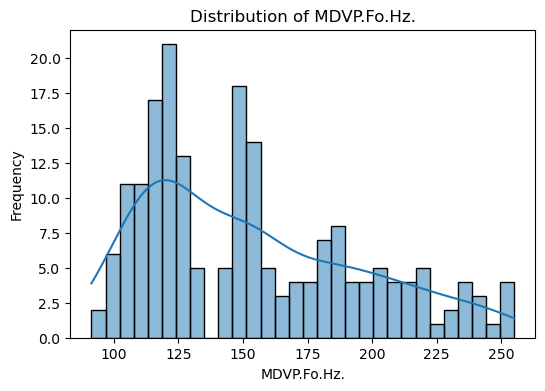

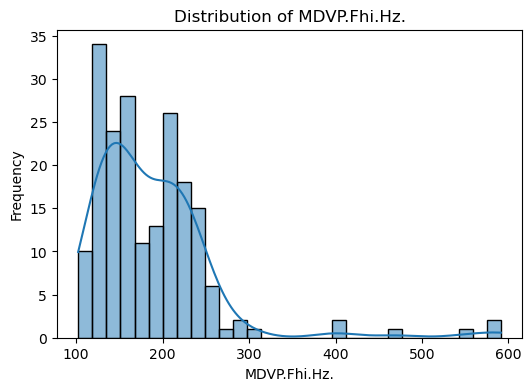

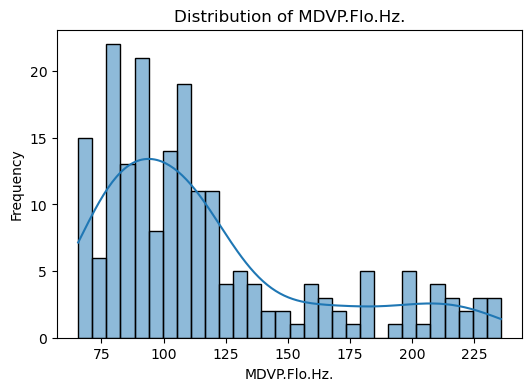

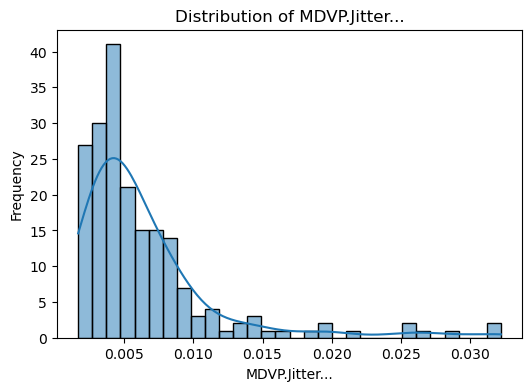

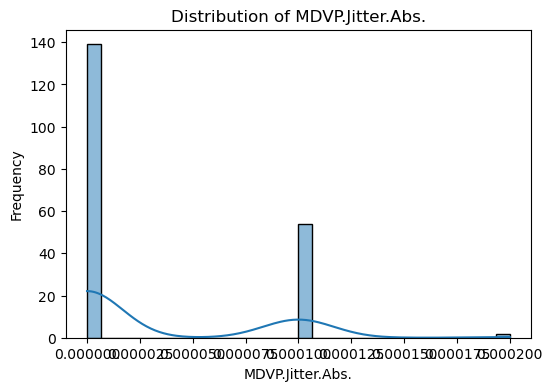

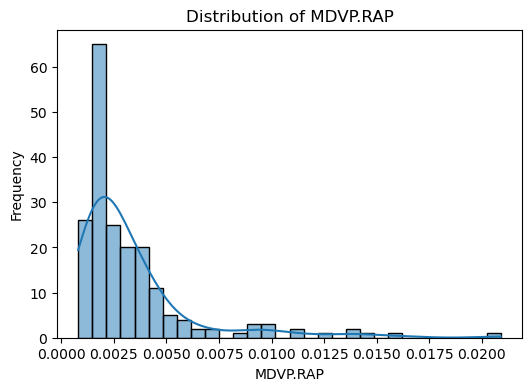

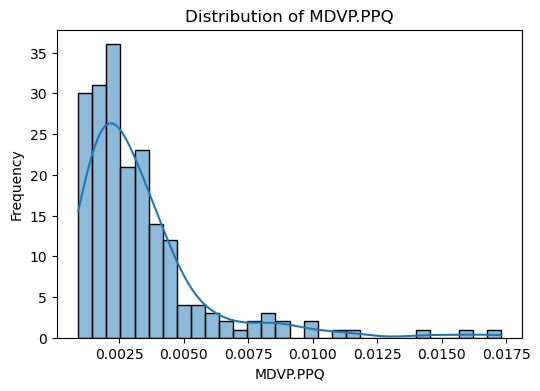

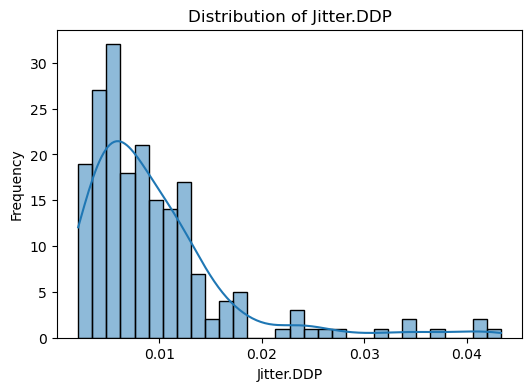

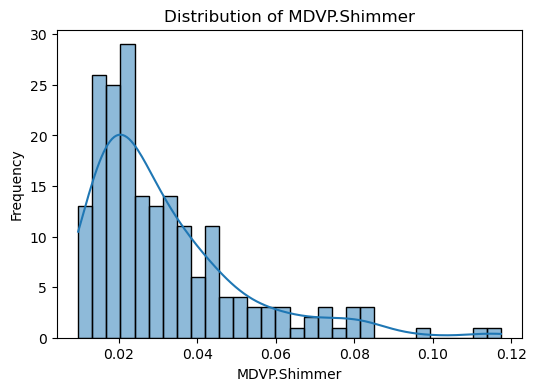

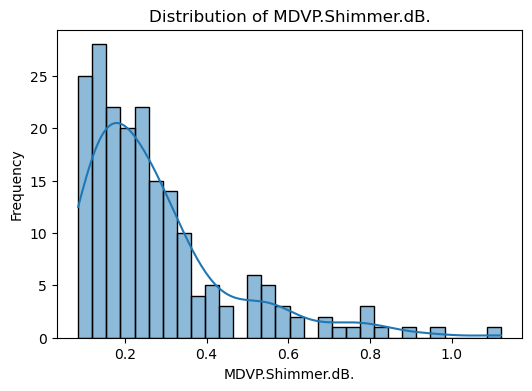

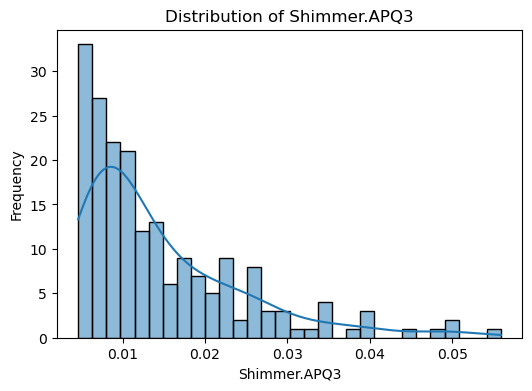

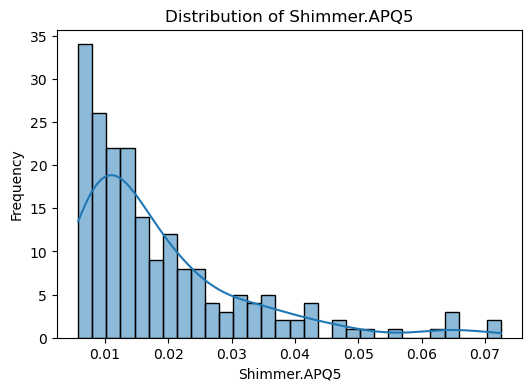

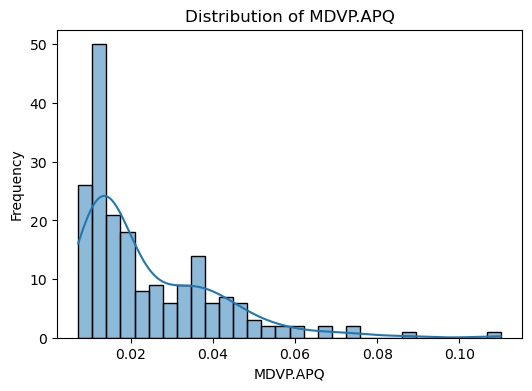

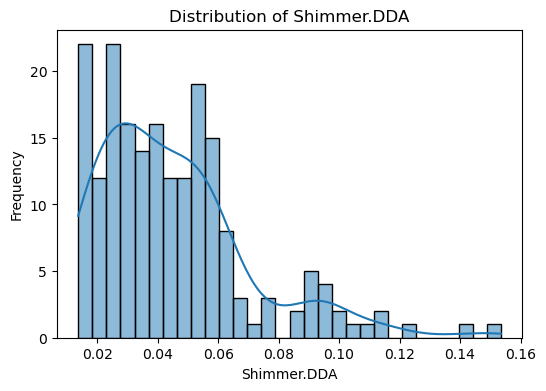

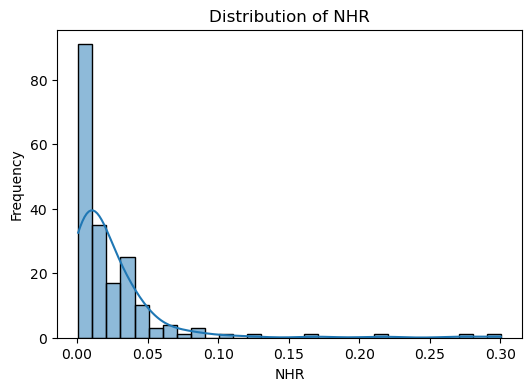

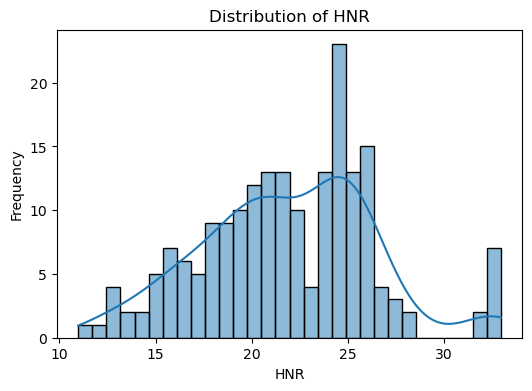

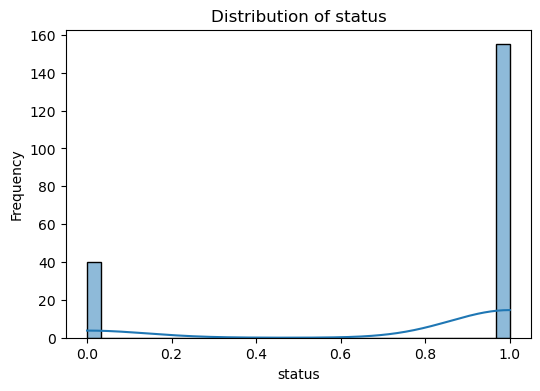

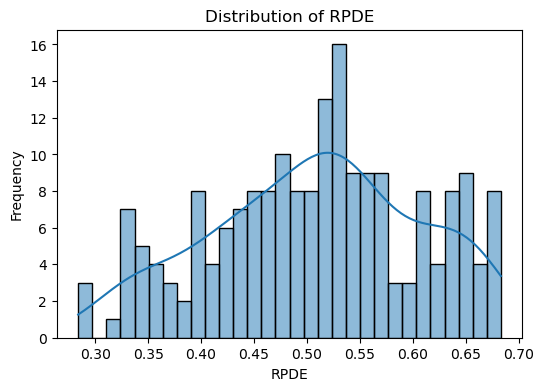

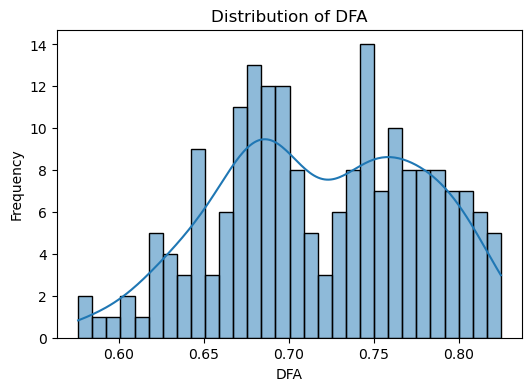

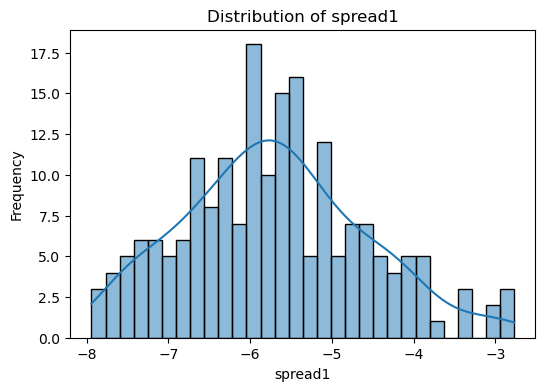

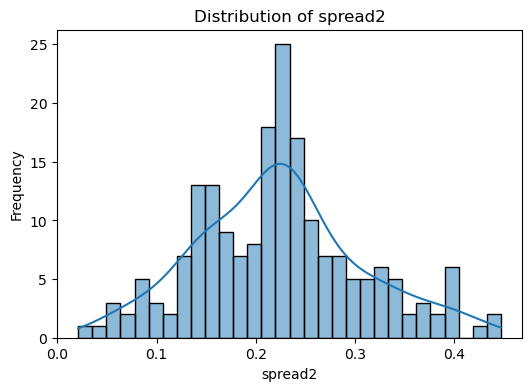

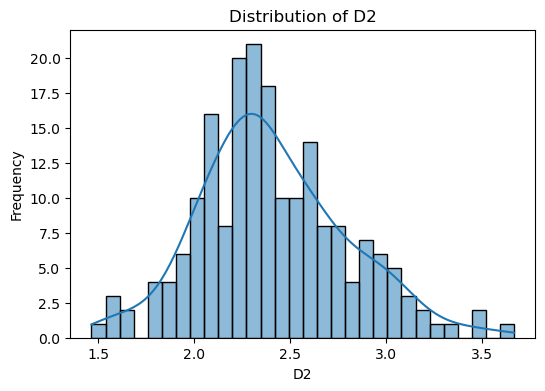

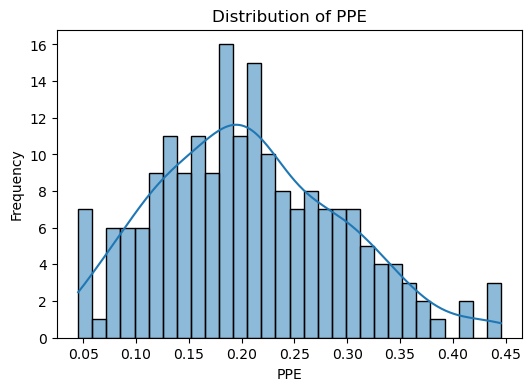

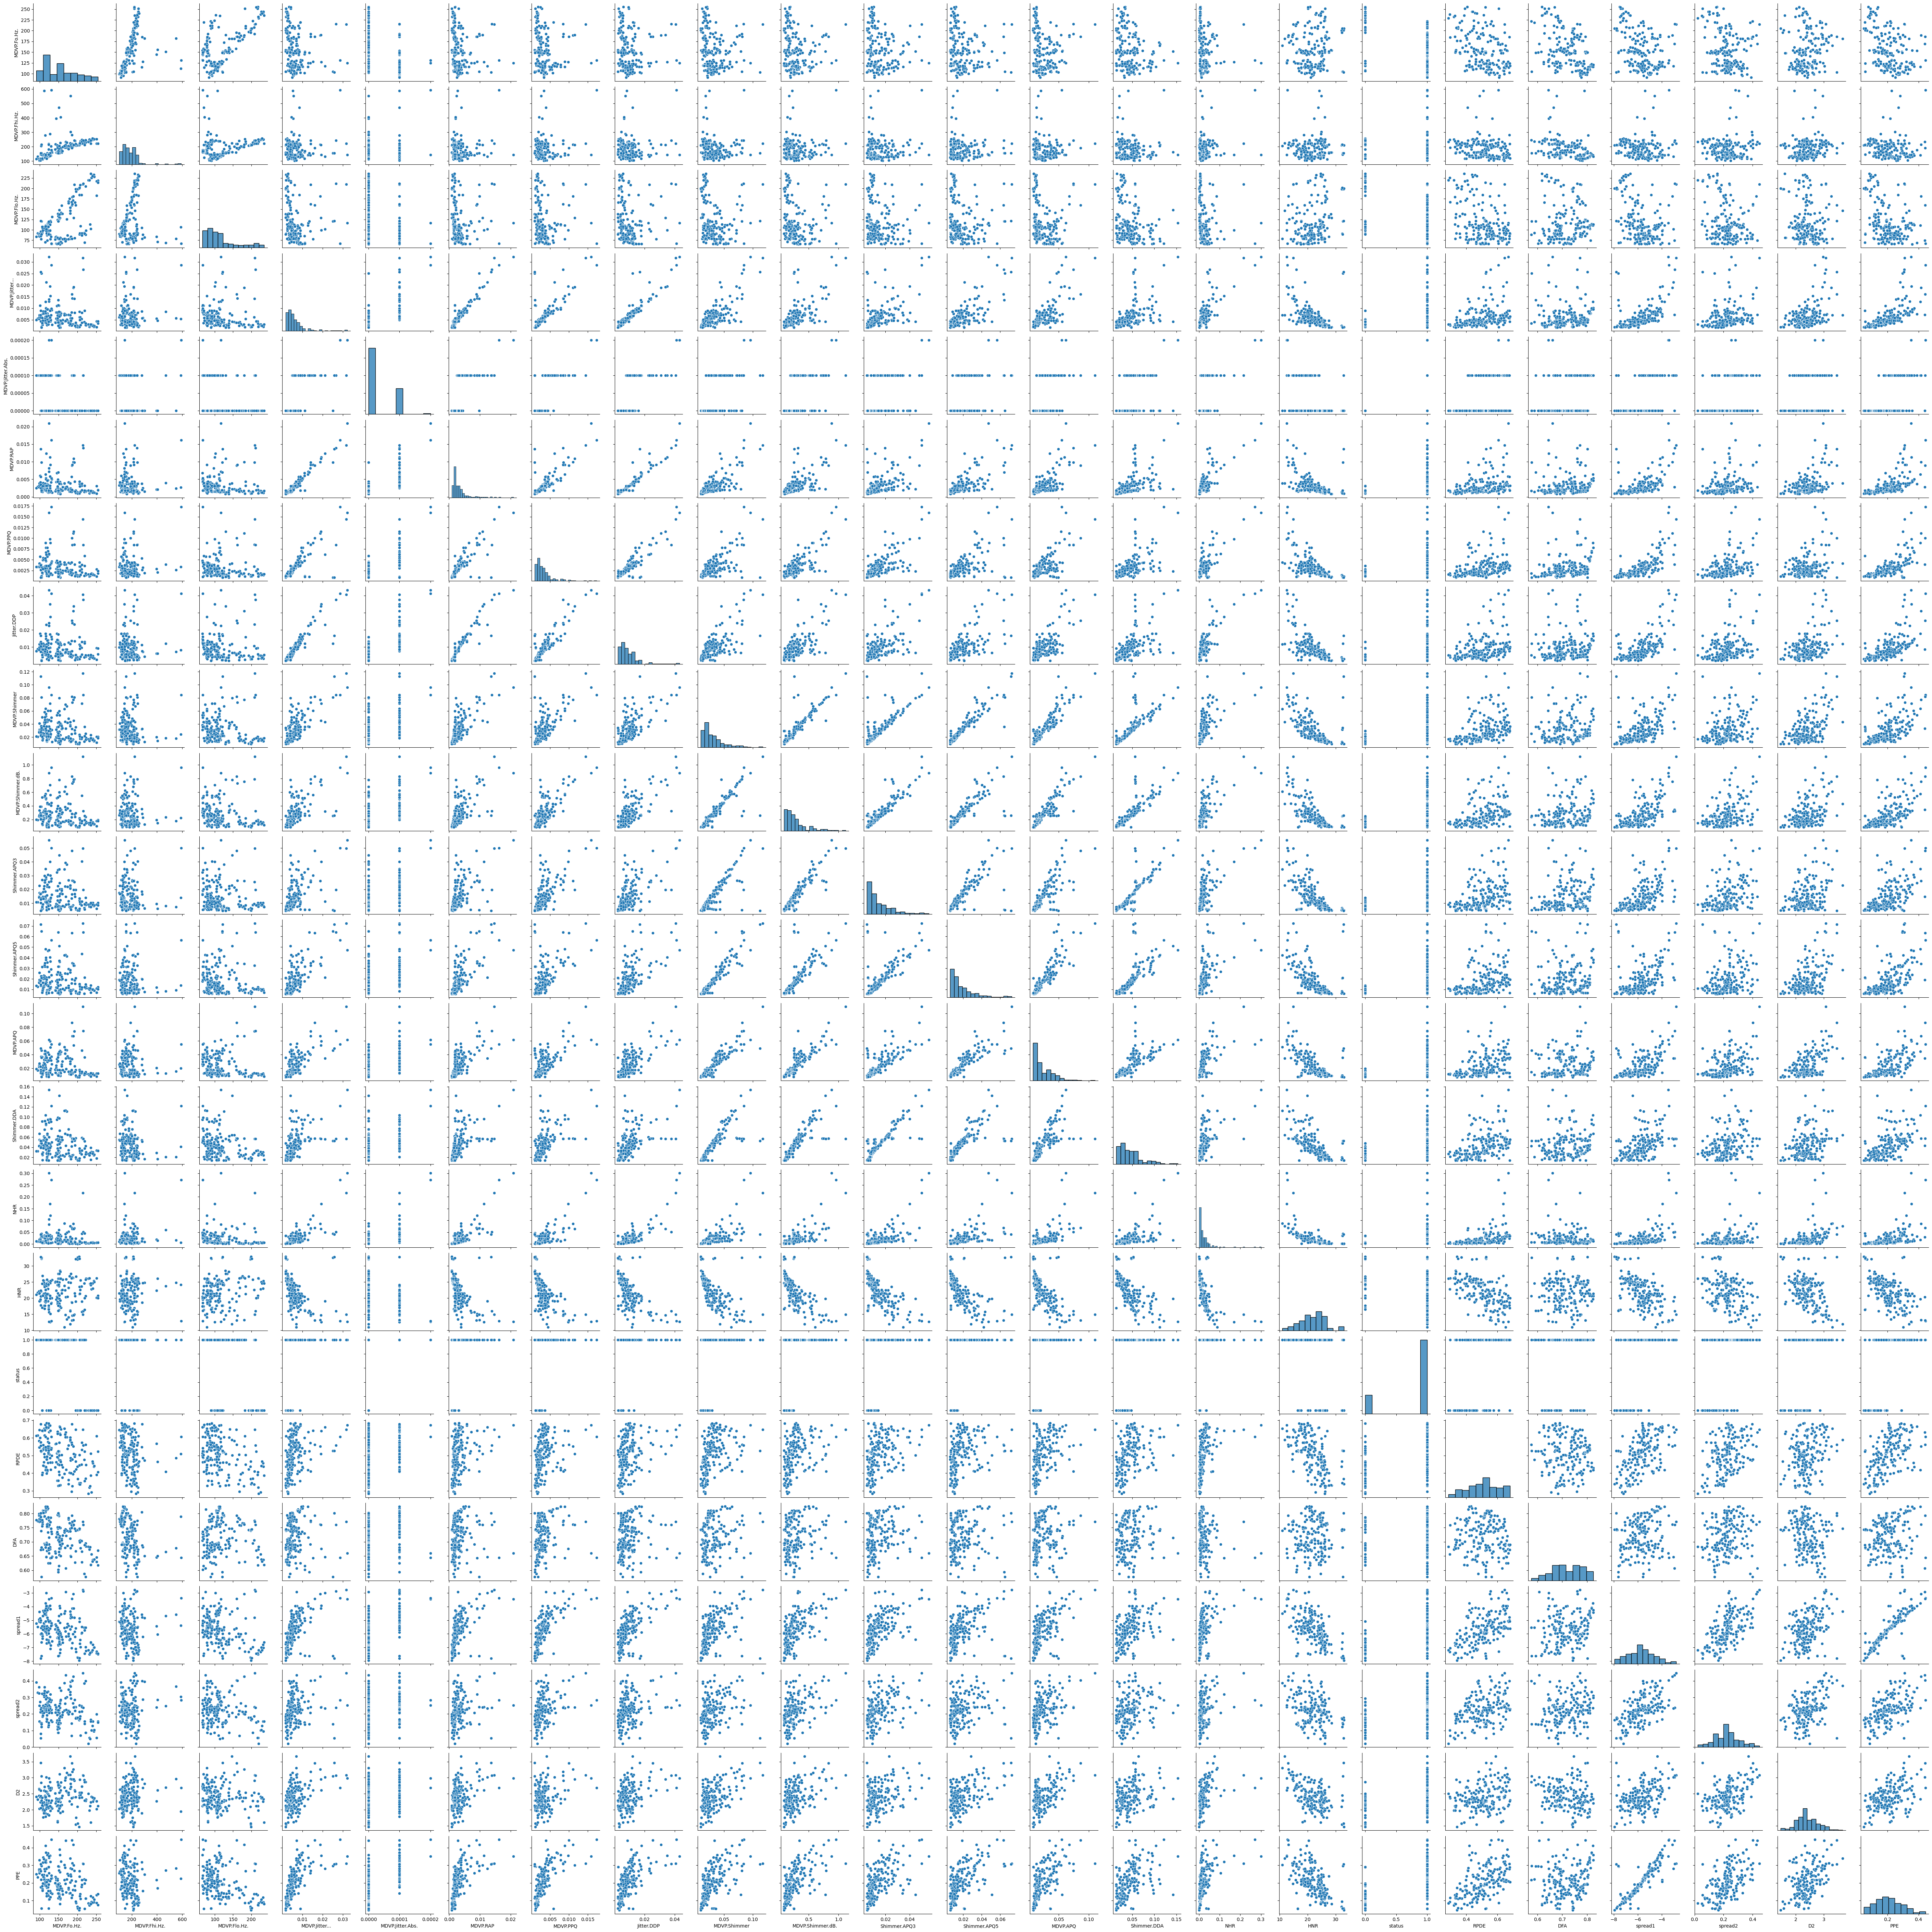

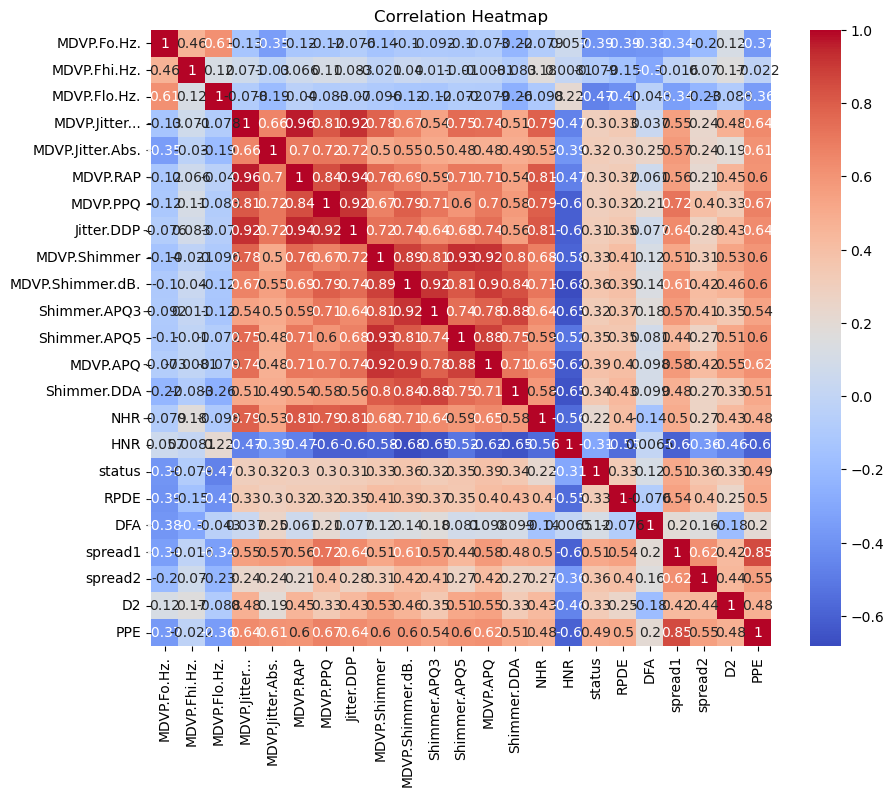

In [ ]:
#  Import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the synthetic dataset
df = pd.read_csv('synthetic_data.csv')

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

#  Check the column names
print("Columns in dataset:")
print(df.columns)

#  Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Visualize distributions for all numeric columns
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#  Pairplot to see relationships between numeric variables
sns.pairplot(df[numeric_cols])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()